### Partie analyse

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [2]:
df = pd.read_csv("dispo.csv", decimal=".", index_col=0)
df.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant
Zone,,,,,,,,
Afghanistan,5.0,57.0,0.0,29.0,28.0,36296113.0,1.889635e+04,530.149831
Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009756.0,3.808514e+05,6723.928582
Albanie,85.0,47.0,0.0,38.0,13.0,2884169.0,1.301973e+04,4521.752219
Algérie,22.0,277.0,0.0,2.0,275.0,41389189.0,1.700970e+05,4134.936054
Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658409.0,3.690849e+06,44670.222288


## CAH

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, Afghanistan to Îles Salomon
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Disponibilité alimentaire (Kcal/personne/jour)  166 non-null    float64
 1   Disponibilité intérieure                        166 non-null    float64
 2   Exportations - Quantité                         166 non-null    float64
 3   Importations - Quantité                         166 non-null    float64
 4   Production                                      166 non-null    float64
 5   Population en 2017                              166 non-null    float64
 6   Valeur US $                                     166 non-null    float64
 7   Valeur US $ par habitant                        166 non-null    float64
dtypes: float64(8)
memory usage: 11.7+ KB


In [4]:
# Extraire les valeurs numériques du dataset
X = df.values
X

array([[5.00000000e+00, 5.70000000e+01, 0.00000000e+00, ...,
        3.62961130e+07, 1.88963520e+04, 5.30149831e+02],
       [1.43000000e+02, 2.11800000e+03, 6.30000000e+01, ...,
        5.70097560e+07, 3.80851444e+05, 6.72392858e+03],
       [8.50000000e+01, 4.70000000e+01, 0.00000000e+00, ...,
        2.88416900e+06, 1.30197299e+04, 4.52175222e+03],
       ...,
       [8.30000000e+01, 3.41000000e+02, 0.00000000e+00, ...,
        1.67853610e+07, 1.04295862e+05, 6.24640425e+03],
       [0.00000000e+00, 1.40000000e+01, 0.00000000e+00, ...,
        1.06399924e+08, 7.67946861e+04, 7.09761008e+02],
       [1.80000000e+01, 3.00000000e+00, 0.00000000e+00, ...,
        6.36039000e+05, 1.46979045e+03, 2.28358112e+03]])

In [5]:
#importer les packages de CAH (Classification ascendante hiérarchique)
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

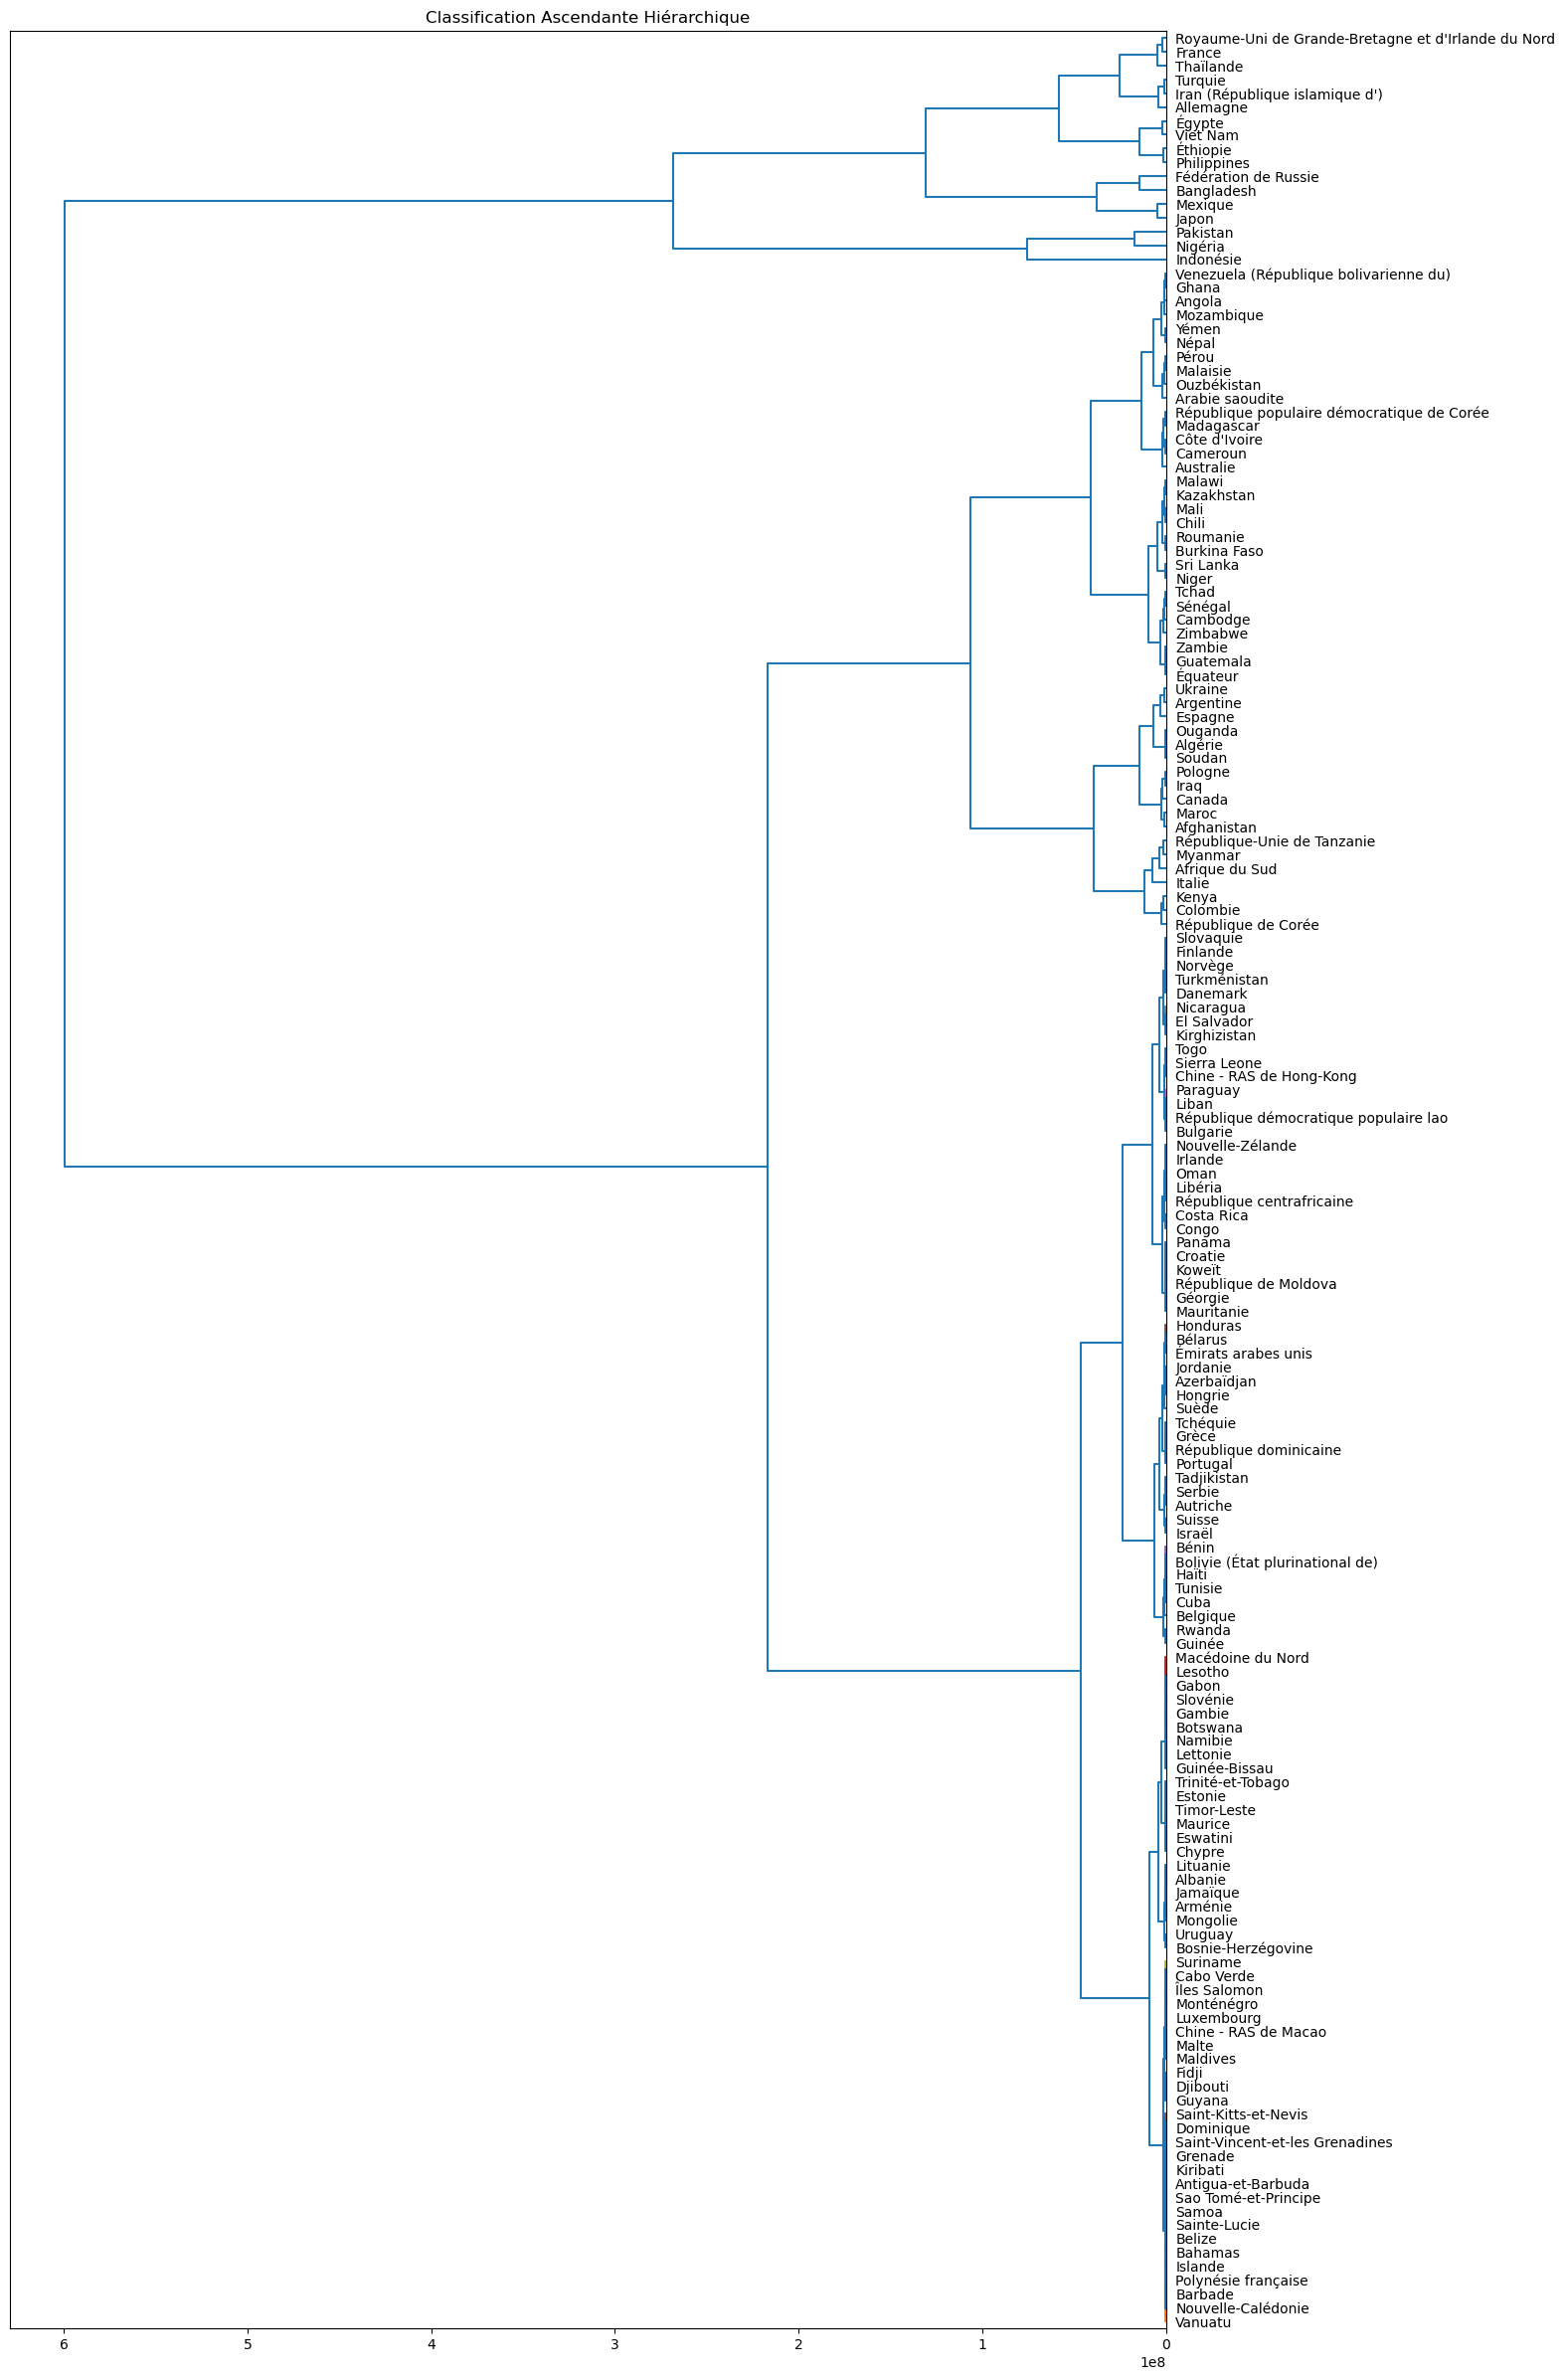

<Figure size 640x480 with 0 Axes>

In [6]:
# Générer le dendrogramme en utilisant sch
plt.figure(figsize=(15,30))
plt.title("Classification Ascendante Hiérarchique")
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), labels = df.index,orientation = "left", color_threshold=50000,  leaf_font_size=10)
plt.show()
plt.savefig('dendrogramme.png')

In [7]:
# Utiliser  AgglomerativeClustering pour determiner le contenu des clusters.
agg_clustering = AgglomerativeClustering(n_clusters=6)

In [8]:
#appliquer l'algorithme sur mes données
agg_clustering.fit(df)

AgglomerativeClustering(n_clusters=6)

In [9]:
#creer une colonne pour mettre les clusters generés
df['label'] = agg_clustering.labels_
df.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant,label
Zone,,,,,,,,,
Afghanistan,5.0,57.0,0.0,29.0,28.0,36296113.0,1.889635e+04,530.149831,5
Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009756.0,3.808514e+05,6723.928582,5
Albanie,85.0,47.0,0.0,38.0,13.0,2884169.0,1.301973e+04,4521.752219,3
Algérie,22.0,277.0,0.0,2.0,275.0,41389189.0,1.700970e+05,4134.936054,5
Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658409.0,3.690849e+06,44670.222288,1


In [10]:
# comprendre la caracterisation des clusters
df.groupby(['label']).mean()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant
label,,,,,,,,
0,15.666667,1269.000000,1.333333,1.000000,1261.000000,2.211435e+08,5.761667e+05,2446.579695
1,64.300000,1431.200000,278.000000,278.900000,1444.200000,8.478446e+07,1.161265e+06,15669.160103
2,43.966667,344.900000,9.900000,68.833333,295.700000,2.300675e+07,1.457596e+05,5860.199529
3,84.544554,92.306931,25.485149,47.930693,77.198020,4.534507e+06,7.432566e+04,16406.449301
4,75.250000,2860.000000,33.500000,566.750000,2539.250000,1.393739e+08,1.988227e+06,15243.015982
5,71.666667,913.055556,118.611111,106.000000,951.888889,4.547281e+07,5.208320e+05,11217.410359


In [11]:
for i in range(6):
    print(f'Cluster {i}')
    print(df[df.label == i].index.tolist())
    print()

Cluster 0
['Indonésie', 'Nigéria', 'Pakistan']

Cluster 1
['Allemagne', 'France', "Iran (République islamique d')", 'Philippines', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Thaïlande', 'Turquie', 'Viet Nam', 'Égypte', 'Éthiopie']

Cluster 2
['Angola', 'Arabie saoudite', 'Australie', 'Burkina Faso', 'Cambodge', 'Cameroun', 'Chili', "Côte d'Ivoire", 'Ghana', 'Guatemala', 'Kazakhstan', 'Madagascar', 'Malaisie', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Népal', 'Ouzbékistan', 'Pérou', 'Roumanie', 'République populaire démocratique de Corée', 'Sri Lanka', 'Sénégal', 'Tchad', 'Venezuela (République bolivarienne du)', 'Yémen', 'Zambie', 'Zimbabwe', 'Équateur']

Cluster 3
['Albanie', 'Antigua-et-Barbuda', 'Arménie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Barbade', 'Belgique', 'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie', 'Bélarus', 'Bénin', 'Cabo Verde', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chypre', 'Congo', 'Costa Rica

## Kmeans

In [12]:
#importer les packages de clustering Kmeans
from sklearn.cluster import KMeans

In [13]:
#centrer et reduire nos données
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)
x_scaled

array([[-1.15061144, -0.47150242, -0.32660384, ..., -0.38006412,
        -0.69047781,  2.08438037],
       [ 1.18011691,  2.39873771,  0.10444398, ...,  0.19935407,
        -0.36358918,  2.08438037],
       [ 0.20053543, -0.48542886, -0.32660384, ..., -0.38947143,
        -0.47981329,  0.11282971],
       ...,
       [ 0.16675676, -0.0759914 , -0.32660384, ..., -0.24335648,
        -0.38879145, -0.87294563],
       [-1.23505812, -0.53138613, -0.32660384, ..., -0.28738039,
        -0.68099848, -1.85872096],
       [-0.93105008, -0.54670521, -0.32660384, ..., -0.40796059,
        -0.59793708,  0.11282971]])

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\louis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
wcss

[1494.0000000000005,
 1035.0364545043183,
 889.7968112537952,
 760.8560591176127,
 634.1385038220133,
 565.616294804073,
 493.81915286986094,
 429.61870123061016,
 395.8635445099325,
 347.58643273394944]

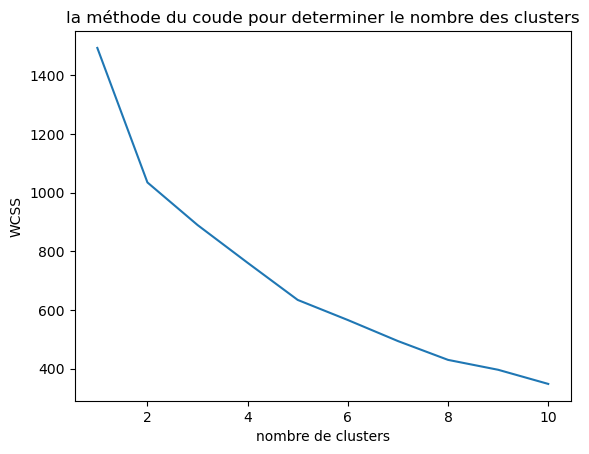

In [16]:
# Méthode du coude
plt.plot(range(1, 11), wcss)
plt.title('la méthode du coude pour determiner le nombre des clusters')
plt.xlabel('nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans_etats = KMeans(n_clusters=3, init = 'k-means++')

In [18]:
kmeans_etats.fit(x_scaled)

KMeans(n_clusters=3)

In [19]:
clusters = kmeans_etats.predict(x_scaled)

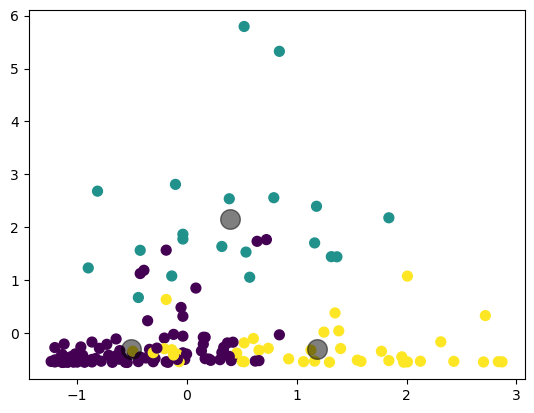

In [20]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=clusters,s=50,cmap='viridis')
centers=kmeans_etats.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

In [21]:
df['cluster']=clusters
df

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant,label,cluster
Zone,,,,,,,,,,
Afghanistan,5.0,57.0,0.0,29.0,28.0,36296113.0,1.889635e+04,530.149831,5,0
Afrique du Sud,143.0,2118.0,63.0,514.0,1667.0,57009756.0,3.808514e+05,6723.928582,5,1
Albanie,85.0,47.0,0.0,38.0,13.0,2884169.0,1.301973e+04,4521.752219,3,0
Algérie,22.0,277.0,0.0,2.0,275.0,41389189.0,1.700970e+05,4134.936054,5,0
Allemagne,71.0,1739.0,646.0,842.0,1514.0,82658409.0,3.690849e+06,44670.222288,1,1
...,...,...,...,...,...,...,...,...,...,...
Égypte,50.0,1250.0,1.0,110.0,1118.0,96442591.0,1.951353e+05,1917.049576,1,0
Émirats arabes unis,147.0,412.0,94.0,433.0,48.0,9487203.0,3.856055e+05,42522.377622,3,2
Équateur,83.0,341.0,0.0,0.0,340.0,16785361.0,1.042959e+05,6246.404252,2,0


In [22]:
df_clusters = df.groupby(['cluster']).median().round(0)
df_clusters

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant,label
cluster,,,,,,,,,
0,37.0,61.0,0.0,13.0,45.0,9450231.0,22947.0,3032.0,3.0
1,100.0,1648.0,139.0,194.0,1737.0,67968636.0,937304.0,12219.0,2.0
2,147.0,111.0,1.0,16.0,56.0,4056099.0,62203.0,29258.0,3.0


In [23]:
for i in range(3):
    print(f'Cluster {i}')
    print(df[df.cluster == i].index.tolist())
    print()

Cluster 0
['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Belize', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Chypre', 'Colombie', 'Congo', 'Costa Rica', 'Croatie', 'Cuba', "Côte d'Ivoire", 'Djibouti', 'El Salvador', 'Estonie', 'Eswatini', 'Fidji', 'Gabon', 'Gambie', 'Ghana', 'Grèce', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti', 'Honduras', 'Iraq', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho', 'Lettonie', 'Liban', 'Libéria', 'Lituanie', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie', 'Monténégro', 'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Oman', 'Ouganda', 'Ouzbékistan', 'Paraguay', 'Pérou', 'Roumanie', 'Rwanda', 'République centrafricaine', 'République de Moldova', 'République dominicaine', 'République démocratique populaire lao', 'Républ

### Regardons de plus près les pays contenant le cluster 2

In [72]:
clust2= df.loc[df['cluster']==2]
clust2.head()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant,label,cluster
Zone,,,,,,,,,,
Antigua-et-Barbuda,233.0,7.0,0.0,7.0,0.0,95426.0,1.467978e+03,16110.556284,3,2
Australie,192.0,1171.0,42.0,16.0,1269.0,24584620.0,1.412243e+06,57430.803787,2,2
Autriche,65.0,173.0,78.0,110.0,148.0,8819901.0,4.172612e+05,47429.535836,3,2
Bahamas,182.0,26.0,0.0,24.0,6.0,381755.0,1.235760e+04,30969.876197,3,2
Barbade,199.0,17.0,0.0,2.0,15.0,286232.0,4.981588e+03,17843.196496,3,2


In [71]:
len(clust2)

39

In [62]:
clust2.sort_values(by='Valeur US $ par habitant', ascending=False)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant,label,cluster
Zone,,,,,,,,,,
Luxembourg,69.0,11.0,1.0,11.0,0.0,591910.0,6.571218e+04,110203.008202,3,2
Suisse,55.0,133.0,4.0,51.0,91.0,8455804.0,7.044785e+05,83353.597572,3,2
Chine - RAS de Macao,142.0,19.0,0.0,23.0,3.0,622585.0,5.044094e+04,78985.632288,3,2
Norvège,66.0,102.0,0.0,2.0,101.0,5296326.0,3.983940e+05,75490.688450,3,2
Islande,104.0,10.0,0.0,2.0,10.0,334393.0,2.472829e+04,71961.532046,3,2
Irlande,100.0,128.0,93.0,99.0,110.0,4753279.0,3.363775e+05,70491.993301,3,2
Danemark,112.0,167.0,139.0,133.0,173.0,5732274.0,3.321211e+05,57888.203512,3,2
Australie,192.0,1171.0,42.0,16.0,1269.0,24584620.0,1.412243e+06,57430.803787,2,2
Suède,61.0,187.0,23.0,84.0,157.0,9904896.0,5.410187e+05,53788.877502,3,2


In [64]:
# Pays dans le cluster 2 qui produise le moins 
clust2.sort_values(by='Production', ascending=True)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant,label,cluster
Zone,,,,,,,,,,
Luxembourg,69.0,11.0,1.0,11.0,0.0,591910.0,6.571218e+04,110203.008202,3,2
Samoa,217.0,15.0,0.0,17.0,0.0,195352.0,8.816941e+02,4246.467778,3,2
Dominique,150.0,4.0,0.0,4.0,0.0,71458.0,5.207000e+02,7395.991648,3,2
Saint-Vincent-et-les Grenadines,243.0,8.0,0.0,9.0,0.0,109827.0,8.476185e+02,8030.568916,3,2
Antigua-et-Barbuda,233.0,7.0,0.0,7.0,0.0,95426.0,1.467978e+03,16110.556284,3,2
Saint-Kitts-et-Nevis,190.0,4.0,0.0,4.0,0.0,52045.0,1.058944e+03,22160.603620,3,2
Polynésie française,167.0,15.0,0.0,15.0,1.0,276102.0,5.833353e+03,19743.958991,3,2
Grenade,192.0,8.0,0.0,7.0,1.0,110874.0,1.125686e+03,9309.267844,3,2
Sainte-Lucie,241.0,11.0,0.0,10.0,1.0,180954.0,1.996770e+03,11270.809198,3,2


In [66]:
# Trie des pays dans notre cluster avec la disponibilité alimentaire la plus faible 
clust2.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant,label,cluster
Zone,,,,,,,,,,
Belgique,44.0,152.0,656.0,338.0,463.0,11419748.0,5.027647e+05,44162.256259,3,2
Suisse,55.0,133.0,4.0,51.0,91.0,8455804.0,7.044785e+05,83353.597572,3,2
Suède,61.0,187.0,23.0,84.0,157.0,9904896.0,5.410187e+05,53788.877502,3,2
République de Corée,62.0,854.0,6.0,137.0,838.0,51096415.0,1.623901e+06,31524.942664,5,2
Autriche,65.0,173.0,78.0,110.0,148.0,8819901.0,4.172612e+05,47429.535836,3,2
Norvège,66.0,102.0,0.0,2.0,101.0,5296326.0,3.983940e+05,75490.688450,3,2
Finlande,68.0,111.0,12.0,16.0,129.0,5511371.0,2.556480e+05,46412.760006,3,2
Luxembourg,69.0,11.0,1.0,11.0,0.0,591910.0,6.571218e+04,110203.008202,3,2
Irlande,100.0,128.0,93.0,99.0,110.0,4753279.0,3.363775e+05,70491.993301,3,2


In [67]:
# Trie des pays dans notre cluster qui importe le moins
clust2.sort_values(by='Importations - Quantité', ascending=True)

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Population en 2017,Valeur US $,Valeur US $ par habitant,label,cluster
Zone,,,,,,,,,,
Guyana,165.0,32.0,0.0,0.0,31.0,775222.0,4.748174e+03,6220.978568,3,2
Israël,234.0,636.0,3.0,0.0,629.0,8243848.0,3.552774e+05,42756.825069,3,2
Bolivie (État plurinational de),155.0,429.0,1.0,1.0,533.0,11192855.0,3.750868e+04,3280.011790,3,2
Nouvelle-Zélande,140.0,168.0,23.0,1.0,223.0,4702034.0,2.066238e+05,43534.089383,3,2
Norvège,66.0,102.0,0.0,2.0,101.0,5296326.0,3.983940e+05,75490.688450,3,2
Islande,104.0,10.0,0.0,2.0,10.0,334393.0,2.472829e+04,71961.532046,3,2
Maurice,128.0,49.0,0.0,2.0,48.0,1264499.0,1.371351e+04,10591.698262,3,2
Barbade,199.0,17.0,0.0,2.0,15.0,286232.0,4.981588e+03,17843.196496,3,2
Dominique,150.0,4.0,0.0,4.0,0.0,71458.0,5.207000e+02,7395.991648,3,2


## Comparaison des résultats

## Le saviez vous ? Et le poulet en France dans tout ca ? 

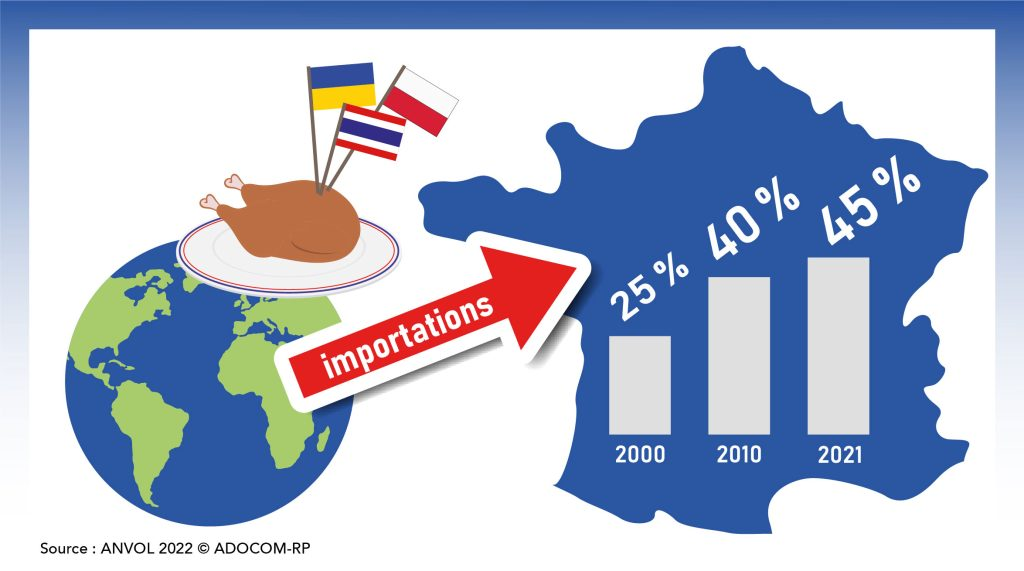